In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('/content/garments_worker_productivity[1].csv')
print(data)

           date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70   

        smv     wip  over_t

In [4]:
data['date'] = pd.to_datetime(data['date'])

data['day_of_year'] = data['date'].dt.dayofyear
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year


data.drop('date', axis=1, inplace=True)
print(data)

       quarter  department        day  team  targeted_productivity    smv  \
0     Quarter1      sweing   Thursday     8                   0.80  26.16   
1     Quarter1  finishing    Thursday     1                   0.75   3.94   
2     Quarter1      sweing   Thursday    11                   0.80  11.41   
3     Quarter1      sweing   Thursday    12                   0.80  11.41   
4     Quarter1      sweing   Thursday     6                   0.80  25.90   
...        ...         ...        ...   ...                    ...    ...   
1192  Quarter2   finishing  Wednesday    10                   0.75   2.90   
1193  Quarter2   finishing  Wednesday     8                   0.70   3.90   
1194  Quarter2   finishing  Wednesday     7                   0.65   3.90   
1195  Quarter2   finishing  Wednesday     9                   0.75   2.90   
1196  Quarter2   finishing  Wednesday     6                   0.70   2.90   

         wip  over_time  incentive  idle_time  idle_men  no_of_style_change

In [5]:
data.fillna(data.mean(), inplace=True)

data = pd.get_dummies(data, columns=['quarter', 'department', 'day'], drop_first=True)
print(data)

      team  targeted_productivity    smv          wip  over_time  incentive  \
0        8                   0.80  26.16  1108.000000       7080         98   
1        1                   0.75   3.94  1190.465991        960          0   
2       11                   0.80  11.41   968.000000       3660         50   
3       12                   0.80  11.41   968.000000       3660         50   
4        6                   0.80  25.90  1170.000000       1920         50   
...    ...                    ...    ...          ...        ...        ...   
1192    10                   0.75   2.90  1190.465991        960          0   
1193     8                   0.70   3.90  1190.465991        960          0   
1194     7                   0.65   3.90  1190.465991        960          0   
1195     9                   0.75   2.90  1190.465991       1800          0   
1196     6                   0.70   2.90  1190.465991        720          0   

      idle_time  idle_men  no_of_style_change  no_o

<ipython-input-5-28d2947edfee>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [6]:
X = data.drop('targeted_productivity', axis=1)
y = data['targeted_productivity']

In [7]:
Y=X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(Y)

[      team    smv          wip  over_time  incentive  idle_time  idle_men  \
1189     8  30.48   914.000000       6840         30        0.0         0   
575      1   3.94  1190.465991       2280          0        0.0         0   
76      10   2.90  1190.465991        960          0        0.0         0   
731      4   4.15  1190.465991       1800          0        0.0         0   
138     12  11.61   548.000000      15120         63        0.0         0   
...    ...    ...          ...        ...        ...        ...       ...   
1044     5   4.60  1190.465991       3360          0        0.0         0   
1095     6   2.90  1190.465991        960          0        0.0         0   
1130     5   3.94  1190.465991          0       2880        0.0         0   
860      7  30.10   444.000000          0          0        5.0        20   
1126    10   2.90  1190.465991        960          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  ...  \
1189 

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions_lr)
lr_r2 = r2_score(y_test, lr_predictions_lr)
print("Linear Regression - Mean Squared Error (MSE):", lr_mse)
print("Linear Regression - R-squared (R2) Score:", lr_r2)

Linear Regression - Mean Squared Error (MSE): 0.008151741112600025
Linear Regression - R-squared (R2) Score: -0.13514922628088888


In [9]:
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha hyperparameter
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression - Mean Squared Error (MSE):", lasso_mse)
print("Lasso Regression - R-squared (R2) Score:", lasso_r2)

Lasso Regression - Mean Squared Error (MSE): 0.007139650370981786
Lasso Regression - R-squared (R2) Score: 0.005786802771628241


In [10]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha hyperparameter
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge Regression - Mean Squared Error (MSE):", ridge_mse)
print("Ridge Regression - R-squared (R2) Score:", ridge_r2)

Ridge Regression - Mean Squared Error (MSE): 0.008149535893790576
Ridge Regression - R-squared (R2) Score: -0.13484214434701136


In [11]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print("K-Nearest Neighbors (KNN) - Mean Squared Error (MSE):", knn_mse)
print("K-Nearest Neighbors (KNN) - R-squared (R2) Score:", knn_r2)

K-Nearest Neighbors (KNN) - Mean Squared Error (MSE): 0.006991733333333335
K-Nearest Neighbors (KNN) - R-squared (R2) Score: 0.026384600042307915


In [12]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print("Support Vector Machine (SVM) - Mean Squared Error (MSE):", svm_mse)
print("Support Vector Machine (SVM) - R-squared (R2) Score:", svm_r2)

Support Vector Machine (SVM) - Mean Squared Error (MSE): 0.008499044407492497
Support Vector Machine (SVM) - R-squared (R2) Score: -0.18351203135974758


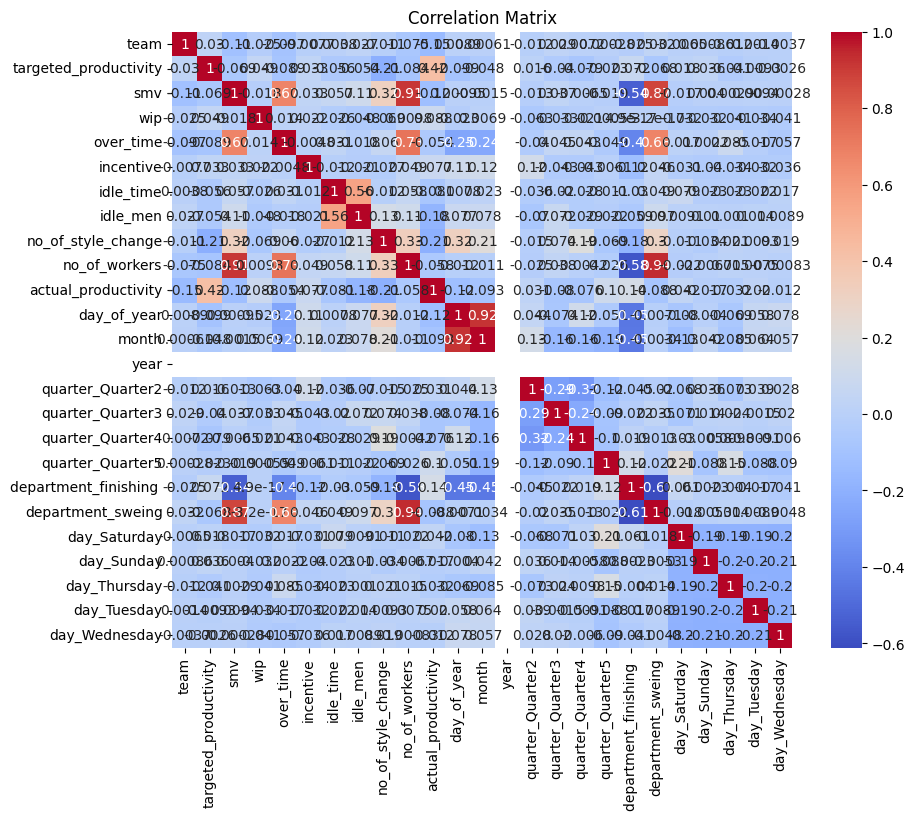

In [13]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

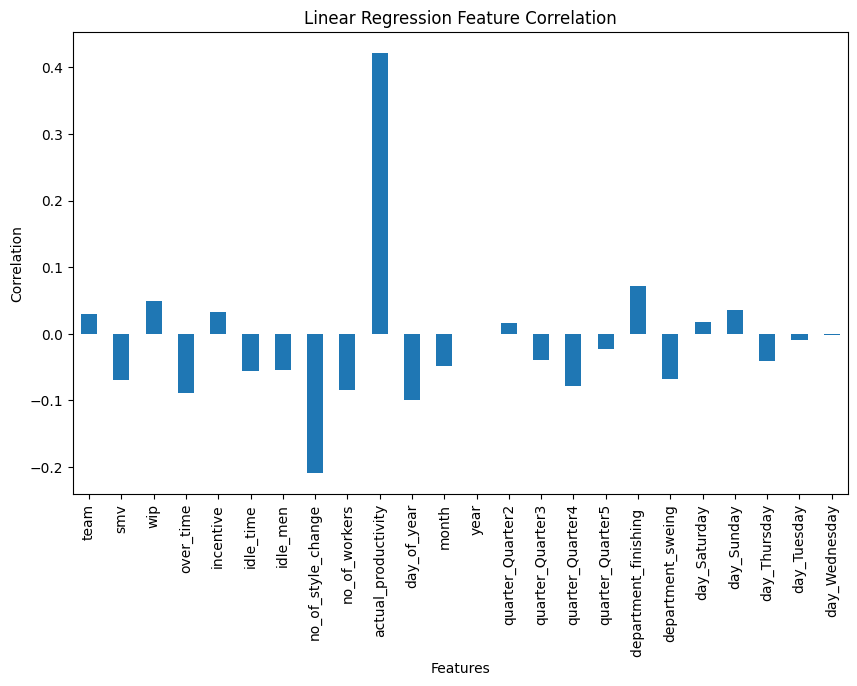

In [14]:
correlation_lr = data.corr()["targeted_productivity"].drop("targeted_productivity")
correlation_lr.plot(kind="bar", figsize=(10, 6))
plt.title("Linear Regression Feature Correlation")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()

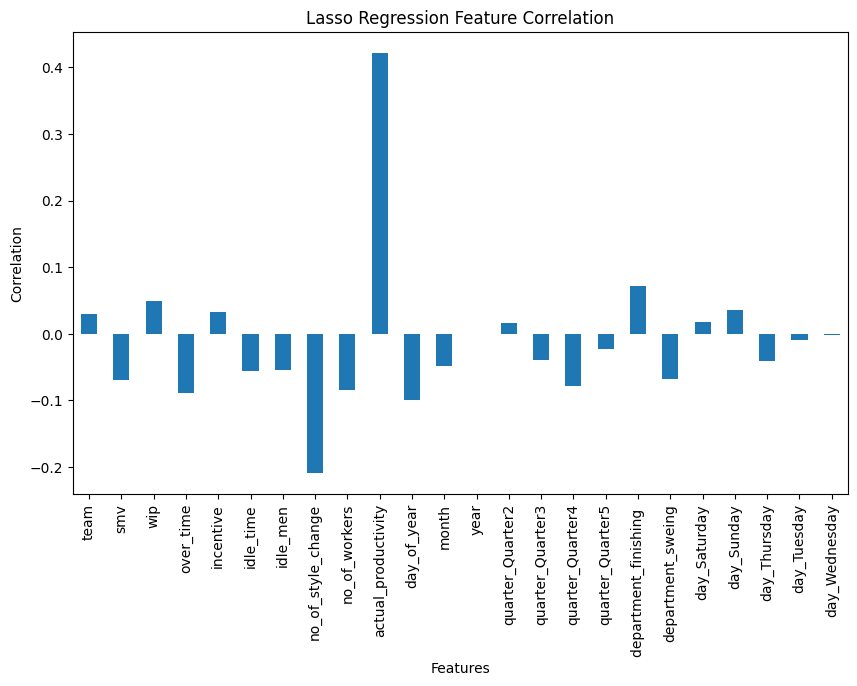

In [15]:
correlation_lasso = data.corr()["targeted_productivity"].drop("targeted_productivity")
correlation_lasso.plot(kind="bar", figsize=(10, 6))
plt.title("Lasso Regression Feature Correlation")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()

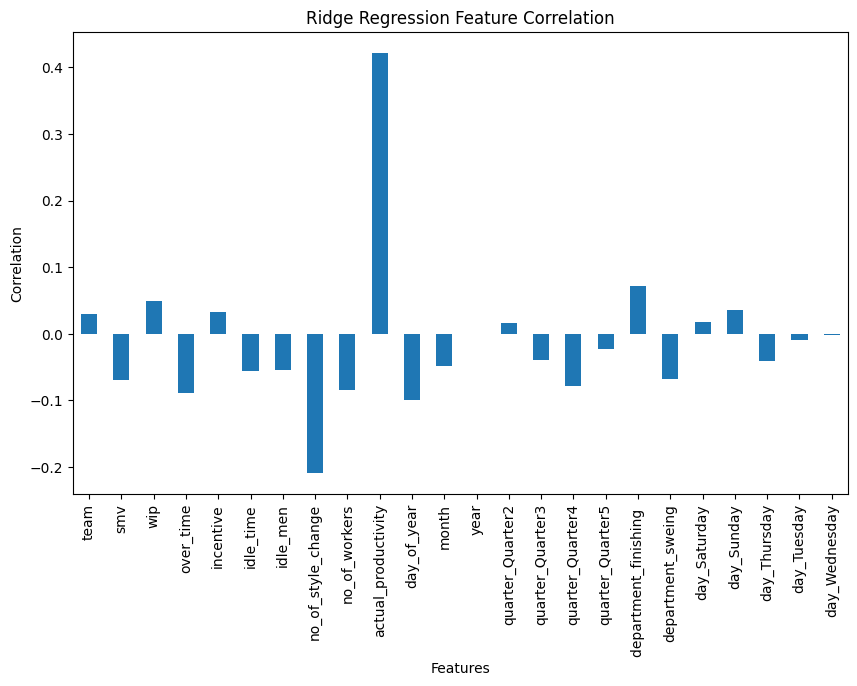

In [16]:
correlation_ridge = data.corr()["targeted_productivity"].drop("targeted_productivity")
correlation_ridge.plot(kind="bar", figsize=(10, 6))
plt.title("Ridge Regression Feature Correlation")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()

<Axes: >

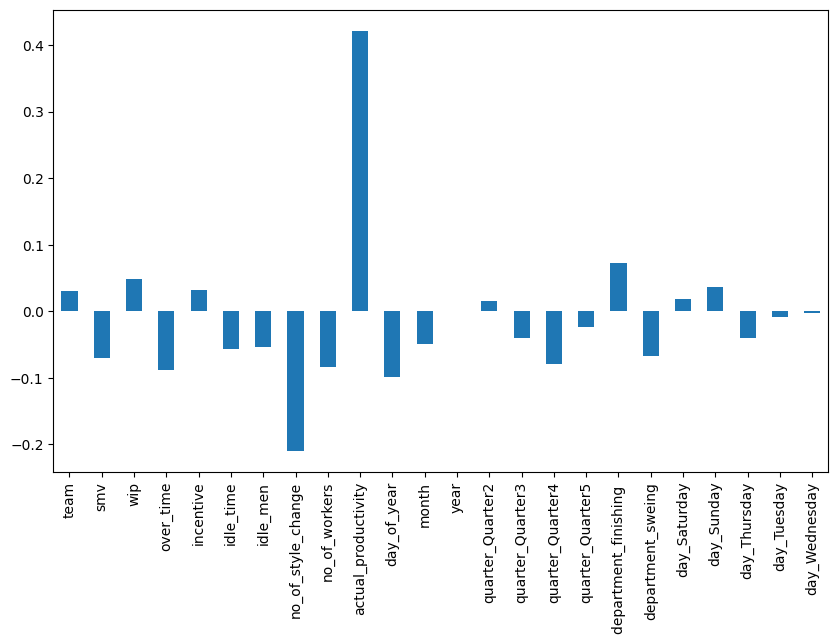

In [17]:
correlation_knn = data.corr()["targeted_productivity"].drop("targeted_productivity")
correlation_knn.plot(kind="bar", figsize=(10, 6))

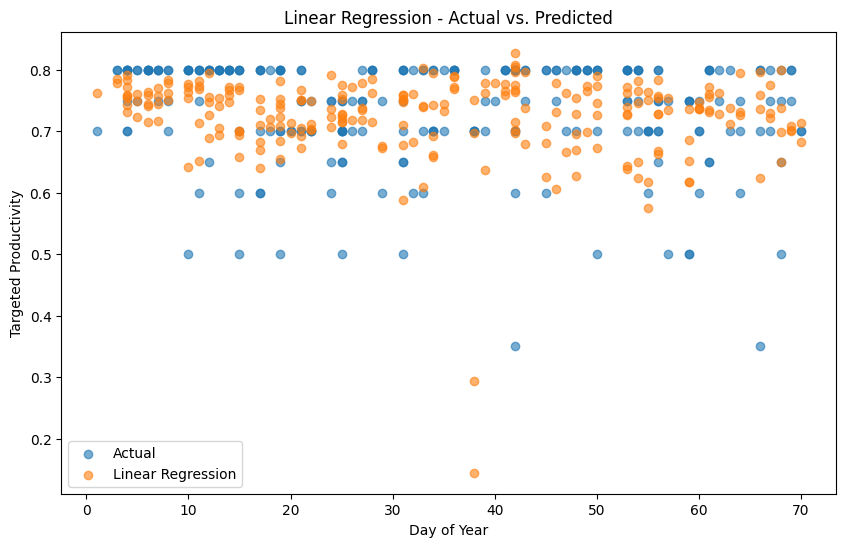

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['day_of_year'], y_test, label="Actual", alpha=0.6)
plt.scatter(X_test['day_of_year'], lr_predictions_lr, label="Linear Regression", alpha=0.6)
plt.xlabel("Day of Year")
plt.ylabel("Targeted Productivity")
plt.title("Linear Regression - Actual vs. Predicted")
plt.legend()
plt.show()

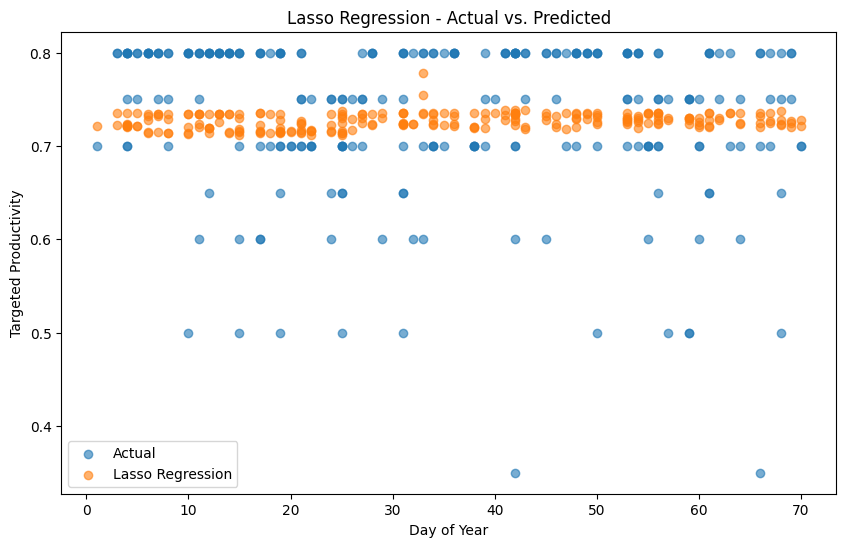

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['day_of_year'], y_test, label="Actual", alpha=0.6)
plt.scatter(X_test['day_of_year'], lasso_predictions, label="Lasso Regression", alpha=0.6)
plt.xlabel("Day of Year")
plt.ylabel("Targeted Productivity")
plt.title("Lasso Regression - Actual vs. Predicted")
plt.legend()
plt.show()

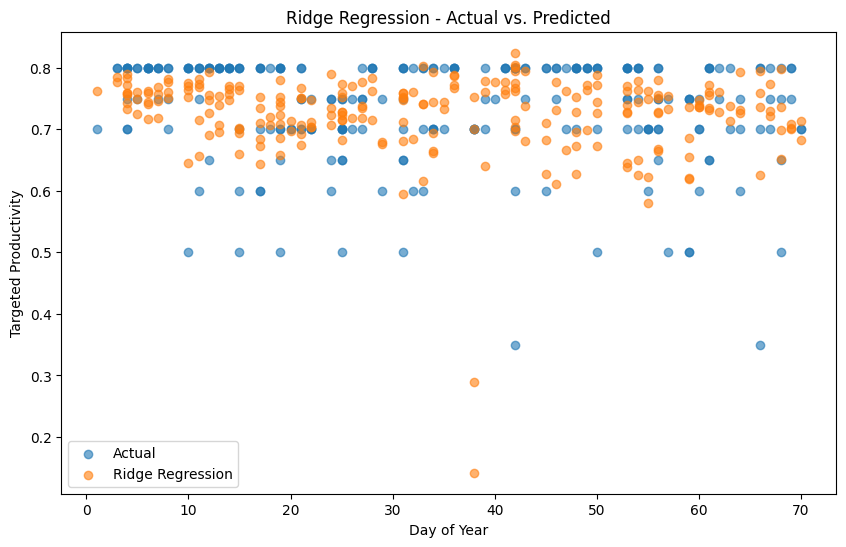

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['day_of_year'], y_test, label="Actual", alpha=0.6)
plt.scatter(X_test['day_of_year'], ridge_predictions, label="Ridge Regression", alpha=0.6)
plt.xlabel("Day of Year")
plt.ylabel("Targeted Productivity")
plt.title("Ridge Regression - Actual vs. Predicted")
plt.legend()
plt.show()

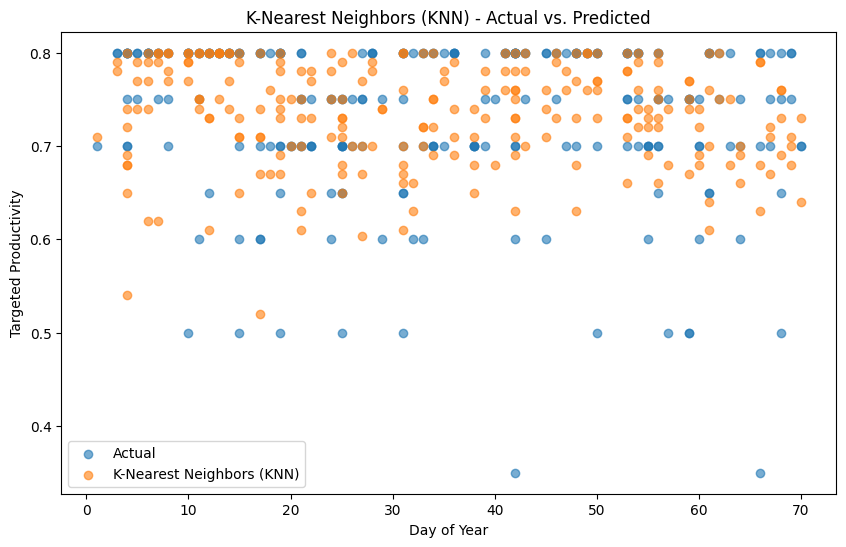

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['day_of_year'], y_test, label="Actual", alpha=0.6)
plt.scatter(X_test['day_of_year'], knn_predictions, label="K-Nearest Neighbors (KNN)", alpha=0.6)
plt.xlabel("Day of Year")
plt.ylabel("Targeted Productivity")
plt.title("K-Nearest Neighbors (KNN) - Actual vs. Predicted")
plt.legend()
plt.show()

In [22]:
from scipy import stats
import matplotlib.pyplot as plt

def create_pp_plot(model_name, model_predictions, y_test):
    sorted_predictions = np.sort(model_predictions)
    sorted_observed = np.sort(y_test)

    quantiles = np.arange(0, 1, 0.001)
    quantiles_model = [np.percentile(sorted_predictions, q * 100) for q in quantiles]
    quantiles_observed = [np.percentile(sorted_observed, q * 100) for q in quantiles]
    plt.figure(figsize=(8, 8))
    plt.scatter(quantiles_model, quantiles_observed, label=f"{model_name} P-P Plot", alpha=0.6)
    plt.plot([0, 1], [0, 1], 'k--', label="Perfect Fit")
    plt.xlabel(f"{model_name} Quantiles")
    plt.ylabel("Observed Quantiles")
    plt.title(f"{model_name} P-P Plot")
    plt.legend()
    plt.show()

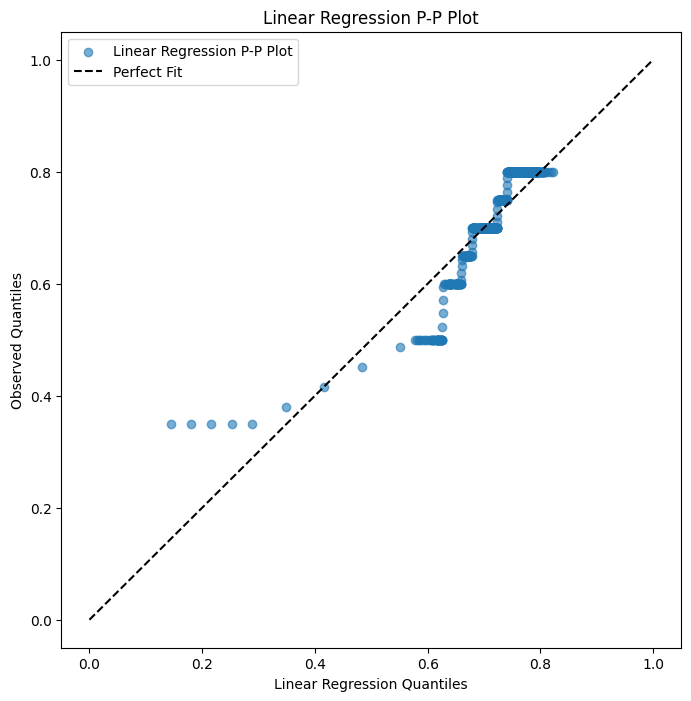

In [23]:
create_pp_plot("Linear Regression", lr_predictions_lr, y_test)

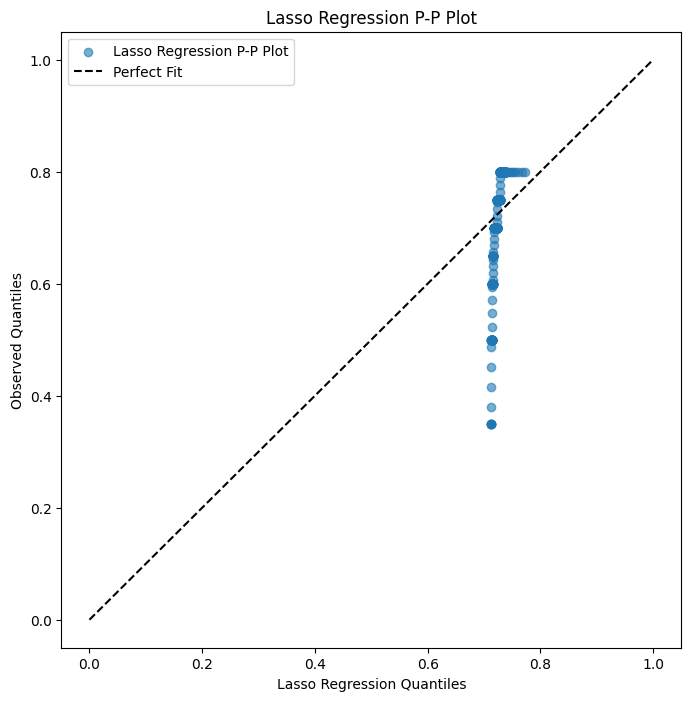

In [24]:
create_pp_plot("Lasso Regression", lasso_predictions, y_test)

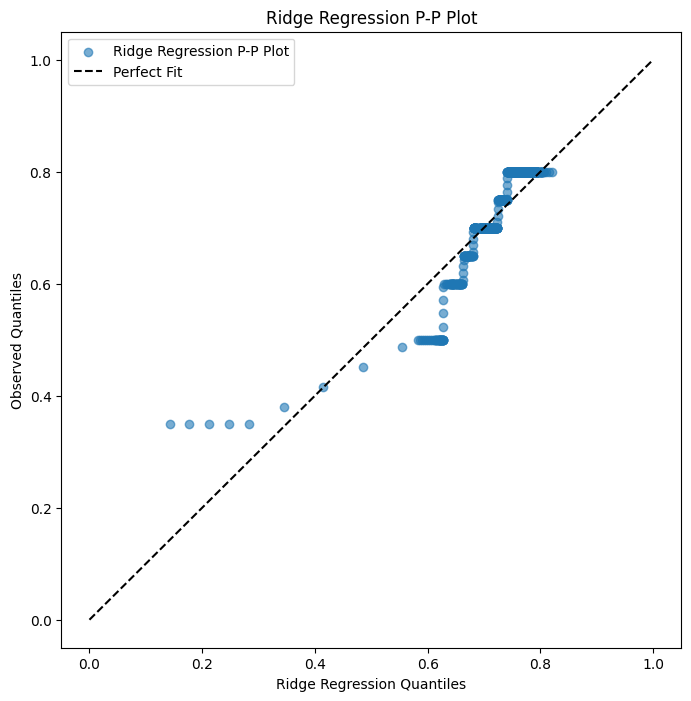

In [25]:
create_pp_plot("Ridge Regression", ridge_predictions, y_test)

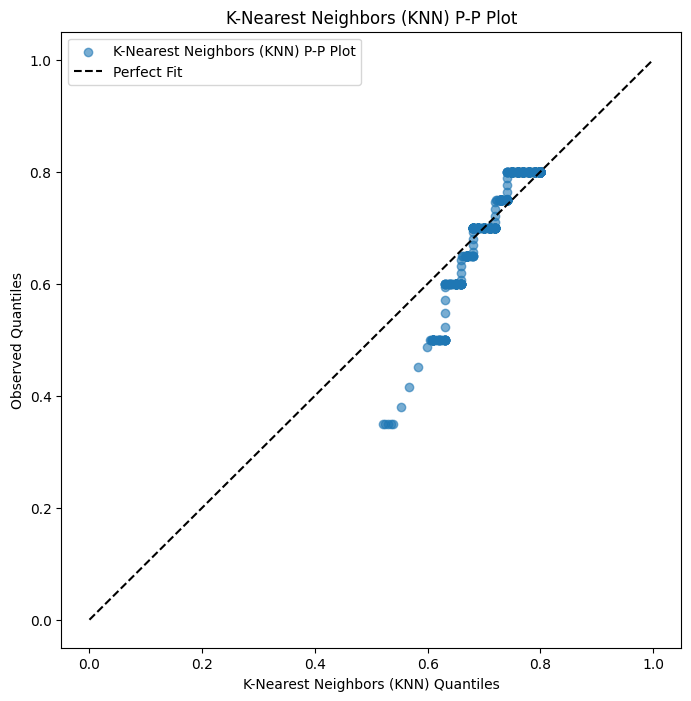

In [26]:
create_pp_plot("K-Nearest Neighbors (KNN)", knn_predictions, y_test)

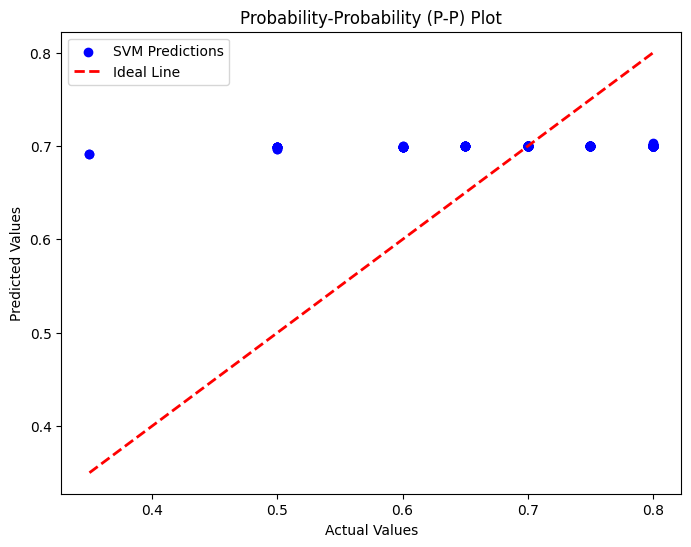

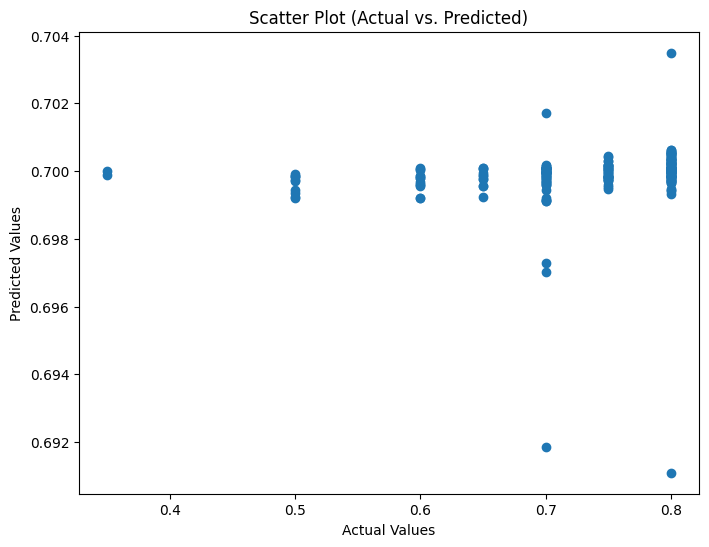

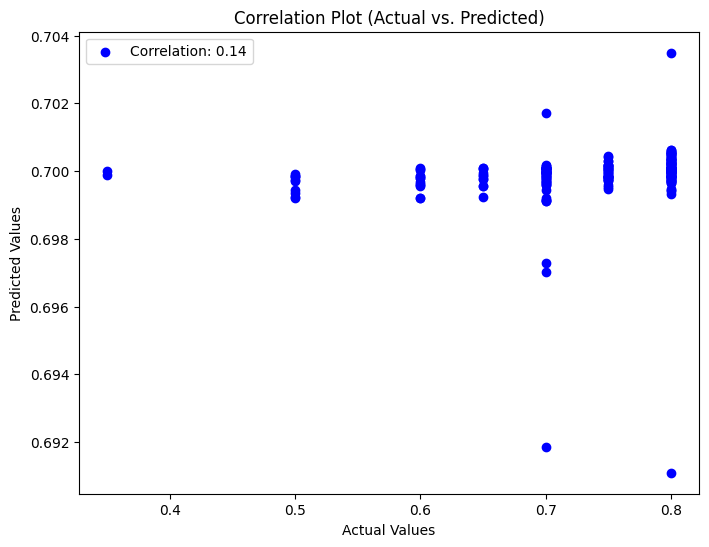

In [28]:
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

plt.figure(figsize=(8, 6))
sorted_y_test = np.sort(y_test)
sorted_svm_predictions = np.sort(svm_predictions)
plt.scatter(sorted_y_test, sorted_svm_predictions, c='b', label='SVM Predictions')
plt.plot([min(sorted_y_test), max(sorted_y_test)], [min(sorted_y_test), max(sorted_y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title("Probability-Probability (P-P) Plot")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, svm_predictions)
plt.title("Scatter Plot (Actual vs. Predicted)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

correlation = np.corrcoef(y_test, svm_predictions)[0, 1]

plt.figure(figsize=(8, 6))
plt.scatter(y_test, svm_predictions, c='b', label=f'Correlation: {correlation:.2f}')
plt.title("Correlation Plot (Actual vs. Predicted)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend(loc='best')
plt.show()

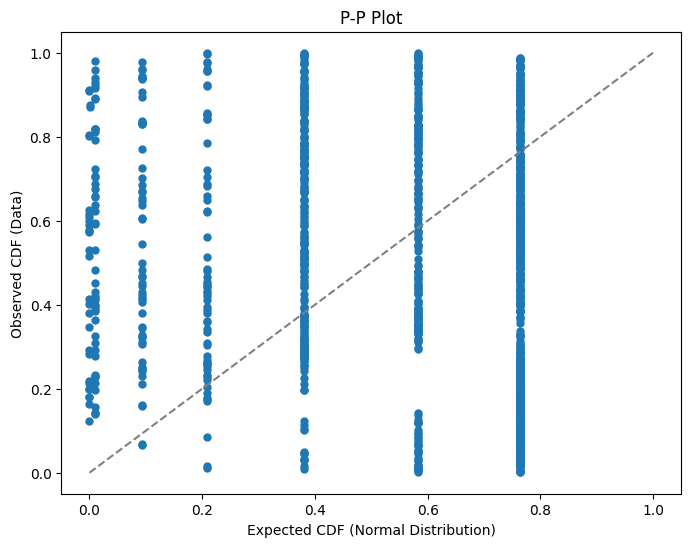

In [29]:
#target variable
target_variable = data['targeted_productivity']

#observed CDF
observed_cdf = np.arange(1, len(target_variable) + 1) / len(target_variable)

#normal distribution to the data
mean, std = stats.norm.fit(target_variable)

#expected CDF based on the normal distribution
expected_cdf = stats.norm.cdf(target_variable, loc=mean, scale=std)

#Create the P-P plot
plt.figure(figsize=(8, 6))
plt.plot(expected_cdf, observed_cdf, 'o', markersize=5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # The diagonal line representing a perfect fit

plt.xlabel('Expected CDF (Normal Distribution)')
plt.ylabel('Observed CDF (Data)')
plt.title('P-P Plot')

plt.show()